We have the below information about the restaurants and we have to predict food cost

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meals

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [76]:
train_data=pd.read_excel('Data_Train.xlsx')

In [77]:
test_data=pd.read_excel('Data_Test.xlsx')

JOIN THE TRAIN AND TEST DATA

In [78]:
train_data['Source'] = 'train'
test_data['Source'] = 'test'

In [79]:
df = pd.concat([train_data, test_data], ignore_index = True)
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


as we have and train and test data and since data seems to be huge we have joined both to avoid double analysis

In [80]:
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
Source            object
dtype: object

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
 9   Source         16921 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [82]:
df.shape



(16921, 10)

In [83]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


CLEANING THE DATA

In [84]:
df.duplicated().sum()


26

In [85]:
df= df.drop_duplicates()


In [86]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4230
Source              0
dtype: int64

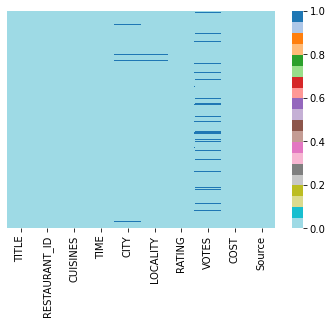

In [87]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap='tab20_r')

we are having null values in city,locality,rating,votes and cost

UNDERSTANDING THE COLUMNS

In [88]:
for column in train_data.columns:
    if train_data[column].dtypes==object:
        print(str(column)+':'+str(train_data[column].unique()))
        print('............................................................................................................')
        print('\n')

TITLE:['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DE

In [89]:
df.apply(lambda x : len(x.unique()))


TITLE              123
RESTAURANT_ID    15574
CUISINES          5183
TIME              3295
CITY               451
LOCALITY          1637
RATING              33
VOTES             2076
COST                87
Source               2
dtype: int64

EXPLORATORY DATA ANALYSIS

before getting into univariate and bivariate analysis let us fill null columns and convert data into float or int to make any analysis

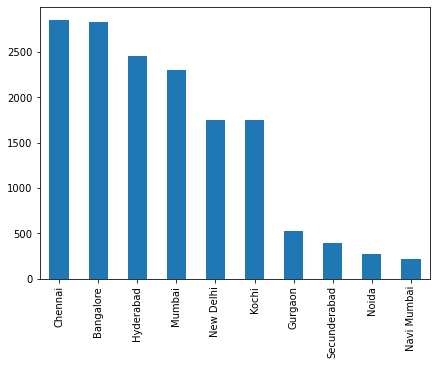

In [90]:
plt.figure(figsize = (7, 5))
Cities = df['CITY'].value_counts()[:10]
Cities.plot.bar();

to convert null values of ratings column i will first choose restaurants with highest population in our dataset 
chennai
bangalore
hyderabad
from these 3 cities cost i will take mean values and fill the null 

TREATING EACH COLUMN 
RATING

In [91]:
df[df['CITY'] == 'Chennai']['COST'].mean()




588.7896916705016

In [92]:
df[df['CITY'] == 'Bangalore']['COST'].mean()


669.0251748251749

In [93]:
df[df['CITY'] == 'Hyderabad']['COST'].mean()

595.1786695986806

In [94]:
df['RATING'].replace({'-': 0.0 ,'NEW' : 5.0}, inplace = True)

In [95]:
df['RATING'] = df['RATING'].astype(float)

In [96]:
df['RATING'].unique()

array([3.6, 4.2, 3.8, 4.1, 4. , 4.3, 3.9, 3.3, 3.4, 0. , 4.5, 3.5, 4.4,
       2.7, 3.7, 4.7, 5. , 3.1, 2.5, 4.6, 2.8, nan, 3. , 3.2, 2.6, 2.9,
       4.9, 4.8, 2.4, 2.3, 2. , 2.1, 2.2])

In [97]:
df['RATING'].fillna(df['RATING'].median(), inplace = True)
df['LOCALITY'].fillna(df['LOCALITY'].mode()[0], inplace = True)
df['CITY'].fillna(df['CITY'].mode()[0], inplace = True)

In [98]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES            1602
COST             4230
Source              0
dtype: int64

VOTES

In [99]:
df.VOTES.fillna('0',inplace=True)
df['VOTES']=df['VOTES'].str.extract('(\d+)').astype(float)

CUISINES


In [100]:
cuisines_list=[]
for row in df['CUISINES']:
    cuisines_list.append(list(row.split(',')))

df['CUISINES']=cuisines_list

In [101]:
df_cuisines=df['CUISINES'].apply(lambda x: pd.Series(1, x))


TITLE

In [102]:
title_list=[]
for row in df['TITLE']:
    title_list.append(list(row.split(',')))
df['TITLE']=title_list


In [103]:
df_title=df['TITLE'].apply(lambda x: pd.Series(1, x))


In [105]:
df_cuisines

,Malwani,Goan,North Indian,Asian,Modern Indian,Japanese,North Indian,Chinese,Biryani,Hyderabadi,...,Egyptian,African,Egyptian,Fish and Chips,Brazilian,South American,Mishti,Falafel,Cantonese,Hawaiian
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16917,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16918,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df_title

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16918,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16919,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


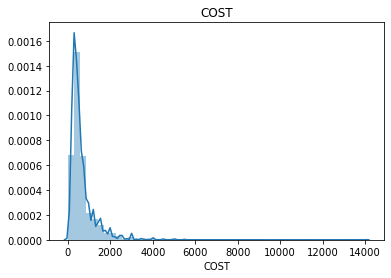

In [107]:
sns.distplot(df["COST"])
plt.title("COST")
plt.show()

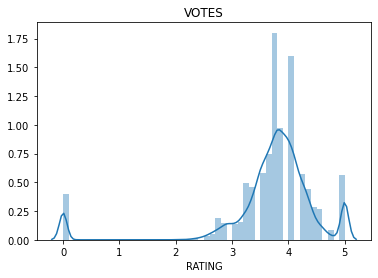

In [108]:
sns.distplot(df["RATING"])
plt.title("VOTES")
plt.show()

In [109]:
df.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,16895.000000,16895.000000,16895.000000,12665.000000
mean,7765.922344,3.700704,379.391773,655.400790
std,4494.226728,0.898039,808.915747,627.389831
min,0.000000,0.000000,0.000000,20.000000
25%,3869.500000,3.500000,40.000000,300.000000
50%,7750.000000,3.800000,133.000000,500.000000
75%,11672.000000,4.100000,409.000000,800.000000
max,15573.000000,5.000000,41186.000000,14000.000000


While observing rating,votes and cost column we can understand 
1.In Rating column mean and standard deviation has hgh difference,whie mean and median comparision and Q3 and max comparision shows data is normally distributed
2.In Votes column it evident that data is not normally distributed as their is high disparities between Q3 & max,mean and std,mean and median
3.In Cost column mean and standard deviation,mean and median is normal but Q3 and max,min and Q1 has data dispersed.


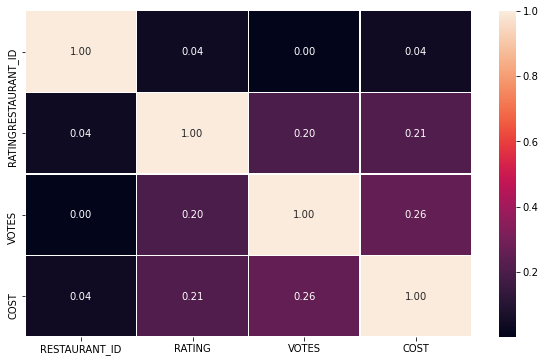

In [110]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(),annot = True,fmt = '.2f',linewidth = .5);

While looking into correlation we can understand cost is correlated with votes and rating column positively by 26% and 21% respectively.


CITY


In [112]:
city_count = df.groupby('CITY').count()
city_count

,TITLE,RESTAURANT_ID,CUISINES,TIME,LOCALITY,RATING,VOTES,COST,Source
CITY,,,,,,,,,
10th avenue,1,1,1,1,1,1,1,1,1
1st Stage,3,3,3,3,3,3,3,1,3
1st Tavarekere,1,1,1,1,1,1,1,1,1
3rd Street,1,1,1,1,1,1,1,1,1
5th Main Teachers Colony Koramangala Block 1 Bangalore 560034,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
opp gurudwara Shakurpur,1,1,1,1,1,1,1,1,1
opp mukteshwar ashram powai,1,1,1,1,1,1,1,1,1
opposite to western side of ITPL Service gate,1,1,1,1,1,1,1,0,1


In [113]:
city_count[city_count['LOCALITY'] > 3]

,TITLE,RESTAURANT_ID,CUISINES,TIME,LOCALITY,RATING,VOTES,COST,Source
CITY,,,,,,,,,
Andheri West,68,68,68,68,68,68,68,47,68
Bandra West,85,85,85,85,85,85,85,69,85
Bangalore,2831,2831,2831,2831,2831,2831,2831,2145,2831
Banglore,8,8,8,8,8,8,8,4,8
Bengalore,7,7,7,7,7,7,7,6,7
Bengaluru,61,61,61,61,61,61,61,42,61
Chennai,3001,3001,3001,3001,3001,3001,3001,2285,3001
Chennai Teynampet,4,4,4,4,4,4,4,3,4
Chennai.,5,5,5,5,5,5,5,3,5


In [114]:
df.replace(to_replace = ['Bangalor','Bangalore-560066','Bengalore','Bengaluru','Banglore','5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
                              'BTM Layout','JP Nagar Bangalore','Whitefield Bangalore',
                              'Bangalore - 560076','Bangalore.',
                              'Banaswadi (Next to Indian Bank) Bangalore','BTM Bangalore',
                              'Bangalore Koramangala 7th Block','bangalore : 560085',
                              'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
                              'Karnataka 560043','Bangalore - 560103','Banglaore',
                              'Kanakapura Road Banglore','BTM 1st Stage','Marathahalli',
                              'Bangalore land mark above mahaveer hard ware','Phase 1 Bangalore',
                              'Bangalore 560076','Bangalore Road','Karnataka','Karnataka 560103',
                              'SG Palya','Karnataka 560102','Karnataka 560037', 'B.B.M.P East (Karnataka) - 560049',
                              'Malleshwaram Bangalore', 'Kadubesanahalli Bangalore',
                             'Mahadevpura','NEW BEL ROAD 560054','JP Nagar','Rajarajeshwari Nagar bangalore',
                              'Ulsoo','1st Tavarekere','Thanisandra','Indiranagar','HSR Layout'], 
                                value='Bangalore',inplace=True)



In [115]:
df.replace(to_replace = ['Chennai Teynampet','Tamil Nadu','Besant Nagar','Arumbakkam chennai-600106.',
                              'Avadi', 'Velachery','Pallavaram','Chennai 600034.','Chennai - 600040', 'Perungudi',
                              'Chennai Padur', 'Medavakkam', 'Chennai Kovalam', 'Chennai opp: Vasanth & co',  
                              'Mogappair. Chennai', 'Chennai Perungudi', 'Chennai Thuraipakkam', 'OMR Karapakkam',
                              'Chennai Thousand Lights',  'Chennai- 600107', 'ECR NEELANKARAI Chennai 600115',
                              'Chennai.', 'Chennai (Bang Opposite Indian Bank)','Chennai Opposite 5C Bus stand', 
                              'Mahabalipuram', 'Chennai Mahabalipuram', 'Nungambakkam','Chennai-40',
                              'East Coast Road (ECR)', 'Ramapuram', 'Chennai Chrompet','Nandanam','Thiruvanmiyur', 
                              'Ambattur','Chennai - 34 Landmark - Near Loyola College', 'Anna Nagar West', 
                              'Anna Salai','Chenn ai', 'Perambur', 'Vadapalani','Palavakkam','Sholinganallur',
                              'Mogappair', 'Ashok Nagar', 'Chennai. (Near Hotel Matshya)',  'Chromepet',
                              'chennai','Tambaram','Vadapalani', 'Anna Nagar East','Kilpauk','Potheri',
                              'GST Road', 'Vadapalani.','Semmancheri','Dewan Rama Road','Navallur','chennai-119','Kolathur'],
                                value='Chennai',inplace=True)

In [116]:
df.replace(to_replace=['Telagana Land Line:040-48507016', 'Telangana','Gachibowli','Kondapur', 'Madhapur',
                            'Hyderabad Behind Vacs Pastries','Hyderabad neerus emporium.', 'Hitech City',
                            'Telangana 500003','Hyderabad.', 'Telangana 500034','Telangana 500032',
                            'Hyderabad-500032','Near Santosh Banjara Hyderabad','Gachibowli Hyderabad',
                            'hyderabad', 'Telengana','Telangana 500081','Kondapur.',  'Telangana 500070',
                            'Begumpet Hyderabad','Hyderabad Manikonda','Jubilee Hills'],value='Hyderabad',inplace=True)
df.replace(to_replace = [ 'Secunderabad', 'Secunderabad main road near signal NMREC COLLEGE',
                          'Secunderabad ECIL','Secunderabad. WE HAVE NO BRANCHES.','Secunderabad.'],
                           value='Secunderabad',inplace=True)


In [117]:
df.replace(to_replace = ['Kerala', 'Edappally','Ernakulam Circle kochi','Kochi Elamkulam','Ponnuruni Kochi', 
                              'Kochi Vyttila', 'Kochi Palarivattom','Ernakulam', 'Kochi Chullickal',
                              'Kochi-683101','p.o Kochi','Kerala 683104','Kerala 682013',
                              'MALAPALLIPURAM P .O THRISSUR','Kochi Ravipuram', 'Kerala 690525','Kochi-18',
                              'MG Road Ernakulam','Kochi Kakkanad', 'Kochi International Airport VIP Road', 
                              'Kerala 682001 India', 'Kerala 683585', 'Kerala 682304','Fort Kochi',
                              'Kochi Aluva 102', 'Kerala 682024', 'Kochi','Kakkanad','Kaloor','Palarivattom',
                              'Kochi-16'], value='Kochi',inplace=True)

In [118]:
df.replace(to_replace = ['Mumbai','Navi Mumbai','Mumbai Mahim','Navi Mumbai.', 'Mumbai - 400007',
                              'Mumbai.','Mumbai Andheri East','Mumbai Dombivali East','navi mumbai',
                              'Mumbai - 400013','West Mumbai','Andheri west Mumbai','Mumbai Chakala',
                              'BK Guda', 'Jogeshwari (w) Mumbai','Mumbai - 80','East Mumbai','Navi-Mumbai',
                              'Mumbai This is a Delivery & Take-away Restaurant only.','Thane Mumbai',
                              'Khar Mumbai','Andheri Lokhandwala','Andheri West','Andheri Lokhandwala.',
                              'Thane','Thane West','Thane (W)','Maharashtra','Maharashtra 400102','Bandra West','Powai'],
                               value='Mumbai',inplace=True)

In [119]:
df.replace(to_replace=[ 'New Delhi','Delhi','Delhi NCR','Chander Nagar New Delhi','New Delhi.',
                            'New Delhi-110024','Greater Kailash 2 New Delhi',
                            'Amrit kaur market opposite new delhi railway station paharganj',
                            'Delhi 110085','Old Delhi','New Delhi..Near by SBI bank','New Delhi 110075',
                            'Janakpuri', 'Dist. Center New Delhi','Gurugram'],value='New Delhi',inplace=True)

df.replace(to_replace=['Noida','Sector 51 Noida','Greater Noida','Near Sector 110 Noida'],value='Noida',
                            inplace=True)

df.replace(to_replace=['Gurgaon','Gurgoan','Gurgaon Haryana India','Gurgaon Haryana'],value='Gurgaon',inplace=True)

DATA PROCESSING

In [121]:
df = pd.concat([df,df_cuisines,df_title], axis=1)


after necessary changes made in the columns,we are combining it with df so that the data will be ready for model building

In [123]:
df.drop(columns='TIME',inplace=True)
df.drop(columns='CUISINES',inplace=True)
df.drop(columns='TITLE',inplace=True)
df.drop(columns='LOCALITY',inplace=True)


the above columns are removed to make sure no duplicay of columns are their

In [148]:
df.isnull().sum()

RESTAURANT_ID                                       0
RATING                                              0
VOTES                                               0
COST                                             4230
Source                                              0
                                                 ... 
kochi                                               0
opp gurudwara Shakurpur                             0
opp mukteshwar ashram powai                         0
opposite to western side of ITPL Service gate       0
ward X11                                            0
Length: 501, dtype: int64

In [125]:
df

,RESTAURANT_ID,CITY,RATING,VOTES,COST,Source,Malwani,Goan,North Indian,Asian,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,9438,Mumbai,3.6,49.0,1200.0,train,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13198,Chennai,4.2,30.0,1500.0,train,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10915,Chennai,3.8,221.0,800.0,train,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6346,Mumbai,4.1,24.0,800.0,train,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15387,Mumbai,3.8,165.0,300.0,train,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,9057,New Delhi,3.9,287.0,NaN,test,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16917,1247,Bangalore,4.3,469.0,NaN,test,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16918,8617,Faridabad,3.7,53.0,NaN,test,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16919,6485,Kochi,0.0,0.0,NaN,test,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df.dtypes

RESTAURANT_ID      int64
CITY              object
RATING           float64
VOTES            float64
COST             float64
                  ...   
DHABA            float64
MEAT SHOP        float64
COCKTAIL BAR     float64
PAAN SHOP        float64
BHOJANALYA       float64
Length: 260, dtype: object

Converting city column with one hot encoder

In [149]:
df1 = pd.get_dummies(df['CITY'])


KeyError: 'CITY'

In [ ]:
df = pd.concat([df,df1], axis=1)


In [ ]:
df.drop(columns='CITY',inplace=True)


In [ ]:
df

now all our columns are converted into float or int for making further analysis

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
train_final = df[df.Source=="train"]
test_final = df[df.Source=="test"]

In [136]:
train_final.shape,test_final.shape

((12665, 501), (4230, 501))

In [137]:
train_final.isnull().sum()

RESTAURANT_ID                                    0
RATING                                           0
VOTES                                            0
COST                                             0
Source                                           0
                                                ..
kochi                                            0
opp gurudwara Shakurpur                          0
opp mukteshwar ashram powai                      0
opposite to western side of ITPL Service gate    0
ward X11                                         0
Length: 501, dtype: int64

In [138]:
train_final.fillna(0,inplace=True)


In [139]:
train_final.drop(columns=["Source"],inplace=True)
test_final.drop(columns=["Source",'COST'],inplace=True)


In [140]:
x= train_final.drop(columns=["COST",'RESTAURANT_ID'])
y = train_final["COST"]


In [141]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.17844422e-01, -4.03247869e-01,  2.57988168e+01, ...,
        -8.88616860e-03,  0.00000000e+00, -8.88616860e-03],
       [ 5.54705157e-01, -4.26660800e-01, -3.87614676e-02, ...,
        -8.88616860e-03,  0.00000000e+00, -8.88616860e-03],
       [ 1.06338771e-01, -1.91299224e-01, -3.87614676e-02, ...,
        -8.88616860e-03,  0.00000000e+00, -8.88616860e-03],
       ...,
       [ 3.30521964e-01,  2.85585226e-01, -3.87614676e-02, ...,
        -8.88616860e-03,  0.00000000e+00, -8.88616860e-03],
       [-2.29936019e-01, -4.24196281e-01, -3.87614676e-02, ...,
        -8.88616860e-03,  0.00000000e+00, -8.88616860e-03],
       [-3.42027615e-01,  3.70611136e-01, -3.87614676e-02, ...,
        -8.88616860e-03,  0.00000000e+00, -8.88616860e-03]])

In [142]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


IMPORTING MODEL LIBRARY

In [143]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

IMPORTING BOOSTING MODELS

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


IMPORTING ERROR METRICS

In [145]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score


In [146]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

All algorithm in For loop 

In [147]:

for m in model:
    m.fit (x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))


score of LinearRegression() is: 0.7209519715699759
MAE: 2097916645735893.2
MSE: 5.974133842369271e+32
RMSE: 2.444204132712583e+16
R2_score: -1.508624716410353e+27
score of SVR() is: 0.02345731336429424
MAE: 322.5575924162784
MSE: 385411.36101817654
RMSE: 620.8150779565333
R2_score: 0.026735723438726877
score of DecisionTreeRegressor() is: 0.9986728161610628
MAE: 240.2299771167048
MSE: 175733.90144189296
RMSE: 419.2062755278038
R2_score: 0.5562260333937905
score of KNeighborsRegressor() is: 0.7277893765747709
MAE: 223.1768653770233
MSE: 179279.78480852742
RMSE: 423.4144362306597
R2_score: 0.5472717524393289
score of Lasso() is: 0.7292401709913168
MAE: 203.41368381653788
MSE: 132255.75892554634
RMSE: 363.66984879908085
R2_score: 0.6660196907748566
score of Ridge() is: 0.7300308052253275
MAE: 205.47893271516787
MSE: 132761.2452169661
RMSE: 364.3641656598054
R2_score: 0.6647432059602143
score of ElasticNet() is: 0.686875519115728
MAE: 208.62731915263498
MSE: 145939.77117867465
RMSE: 382.02

FROM THE ABOVE RESULTS WE CAN UNDERSTAND DECISION TREE REGRESSOR,RANDOM FOREST REGRESSOR IS WORKING BETTER THAN OTHER MODELS

CROSS VALIDATE THE MODEL

In [150]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print("Mean Score:",score.mean())
    print("Standard deviation:",score.std())
    print('****************************************************************************************************************')

Model: LinearRegression()
Score: [-2.48720302e+27 -2.23371918e+27 -2.44808736e+27 -7.53841335e+26
 -1.10583970e+27]
Mean Score: -1.8057381195517603e+27
Standard deviation: 7.289059461893418e+26
****************************************************************************************************************
Model: SVR()
Score: [0.01953943 0.03211616 0.0330913  0.01608995 0.01607656]
Mean Score: 0.023382680607855956
Standard deviation: 0.007640217761832233
****************************************************************************************************************
Model: DecisionTreeRegressor()
Score: [0.47166698 0.47828408 0.38346082 0.41109297 0.57760132]
Mean Score: 0.46442123464074003
Standard deviation: 0.06701179617475243
****************************************************************************************************************
Model: KNeighborsRegressor()
Score: [0.56494712 0.59914562 0.58839371 0.57823635 0.62199219]
Mean Score: 0.590542997403458
Standard deviation: 0.0193

USING GRIDSEARCHCV TO FIND OUT BEST PARAMETERS

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters={'criterion':['mse','mae','friedman_mse','poisson'],'splitter':['best','random'],'max_depth':[4,6,8,10],'random_state':[10,20,30,40]}

dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x,y)
print(clf.best_params_)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion=,splitter=,max_depth,random_state=)
dt.fit(x_train,y_train)
print('Score:',dt.score(x_train,y_train))
y_pred=dt.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
plt.show()
    

PLOTTING 

In [ ]:
sns.distplot(y_test,y_Pred)
plt.show()



scatterplot between test data and prediction

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.y_label("y_pred")
plt.title("Scatterplot between test data & predicted data")
plt.show()

SERIALIZATION

In [ ]:
import pickle
filename='restaurant_cost.csv.pkl'

In [ ]:
pickle.dump(dt,open(filename,'wb'))

CONCLUSION

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dt.predict(x_test))

In [ ]:
df_final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [ ]:
df_final